# Полтавский Артем. Лабораторная работа №5.
## github.com/poltavski

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline

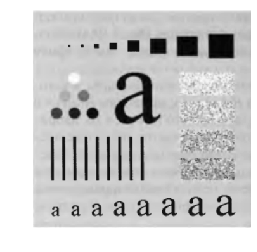

In [2]:
img = cv2.imread('source.png', 0)
width, height = img.shape
plt.axis('off')
plt.imshow(img, cmap="gray")


# Функции вычисления спектра, прямой и обратной трансформации Фурье
## Функции нормализации и отрисовки изображения

In [3]:
def calculate_spectrum(img):
    fft = np.fft.fft2(img) # fourier transform
    fft_shift = np.fft.fftshift(fft) # array shift into center of spectrum
    return fft_shift

def change_spectrum(img, mask):
    fshift = img * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_ifft = np.fft.ifft2(f_ishift) # backwards fourier transform
    return fshift, img_ifft

def show_spectrum(img):
    spectrum_magnitude = np.abs(img) ** (0.1)
    plt.imshow(spectrum_magnitude, cmap='gray')
    
def norm_image(np_img, mul_const=1.0):
    return mul_const * (np_img-np_img.min()) / (np_img.max() - np_img.min())

In [4]:
def filter_result(img, spectrum, D=20, n=2, use_filter="ideal_low"):
    """Show result from given filter param
    
    Available filter params:
        ideal_low
        ideal_high
        gauss_low
        gauss_high
        batterwort_low
        batterwort_high
        
    """
    if use_filter == "ideal_low":
        custom_filter = ideal_low_filter(D)
        title_str = f"Фильтр: {use_filter}. D={D}"
    elif use_filter == "ideal_high":
        custom_filter = ideal_high_filter(D)
        title_str = f"Фильтр: {use_filter}. D={D}"
    elif use_filter == "gauss_low":
        custom_filter = gauss_low_filter(D)
        title_str = f"Фильтр: {use_filter}. D={D}"
    elif use_filter == "gauss_high":
        custom_filter = gauss_high_filter(D)
        title_str = f"Фильтр: {use_filter}. D={D}"
    elif use_filter == "batterwort_low":
        custom_filter = batterwort_low_filter(D, n)
        title_str = f"Фильтр: {use_filter}. D={D}, n={n}"
    elif use_filter == "batterwort_high":
        custom_filter = batterwort_high_filter(D, n) 
        title_str = f"Фильтр: {use_filter}. D={D}, n={n}"
    # display image
    plt.figure()
    f, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,5))
    
    spectrum_magnitude_forward = np.abs(spectrum) ** (0.1)
    ax1.set_title("Спектр")
    ax1.imshow(spectrum_magnitude_forward, cmap='gray')
    ax1.axis('off')
    spectrum_back, img_back = change_spectrum(spectrum, custom_filter)
    
    spectrum_magnitude_back = np.abs(spectrum_back) ** (0.1)
    ax2.set_title("Обратный спектр")
    ax2.imshow(spectrum_magnitude_back, cmap='gray')
    ax2.axis('off')
    ax3.set_title("Обратное преобразование Фурье")
    img_filt = np.abs(img_back)
    img_filt_norm = norm_image(img_filt)
    ax3.imshow(img_filt_norm, cmap="gray")
    ax3.axis('off')
    
    f.suptitle(title_str, fontsize=20)
    plt.show()
    

def filter_result_inter(D=20, n=2, use_filter="ideal_low"):
    """Show result from given filter param
    
    Available filter params:
        ideal_low
        ideal_high
        gauss_low
        gauss_high
        batterwort_low
        batterwort_high
        
    """
    img = cv2.imread('source.png', 0)
    spectrum = calculate_spectrum(img)
    
    if use_filter == "ideal_low":
        custom_filter = ideal_low_filter(D)
        title_str = f"Фильтр: {use_filter}. D={D}"
    elif use_filter == "ideal_high":
        custom_filter = ideal_high_filter(D)
        title_str = f"Фильтр: {use_filter}. D={D}"
    elif use_filter == "gauss_low":
        custom_filter = gauss_low_filter(D)
        title_str = f"Фильтр: {use_filter}. D={D}"
    elif use_filter == "gauss_high":
        custom_filter = gauss_high_filter(D)
        title_str = f"Фильтр: {use_filter}. D={D}"
    elif use_filter == "batervort_low":
        custom_filter = batervort_low_filter(D, n)
        title_str = f"Фильтр: {use_filter}. D={D}, n={n}"
    elif use_filter == "batervort_high":
        custom_filter = batervort_high_filter(D, n) 
        title_str = f"Фильтр: {use_filter}. D={D}, n={n}"
    # display image
    plt.figure()
    f, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,5))
    
    spectrum_magnitude_forward = np.abs(spectrum) ** (0.1)
    ax1.set_title("Спектр")
    ax1.imshow(spectrum_magnitude_forward, cmap='gray')
    ax1.axis('off')
    spectrum_back, img_back = change_spectrum(spectrum, custom_filter)
    
    spectrum_magnitude_back = np.abs(spectrum_back) ** (0.1)
    ax2.set_title("Обратный спектр")
    ax2.imshow(spectrum_magnitude_back, cmap='gray')
    ax2.axis('off')
    ax3.set_title("Обратное преобразование Фурье")
    img_filt = np.abs(img_back)
    img_filt_norm = norm_image(img_filt)
    ax3.imshow(img_filt_norm, cmap="gray")
    ax3.axis('off')
    
    f.suptitle(title_str, fontsize=20)
    plt.show()

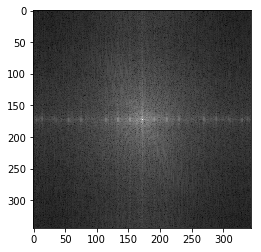

In [5]:
spectrum = calculate_spectrum(img)
show_spectrum(spectrum)

In [6]:
def distance(u, v, width, height):
    return (((u - width / 2)**2) + (v - height / 2) ** 2) ** (1/2)

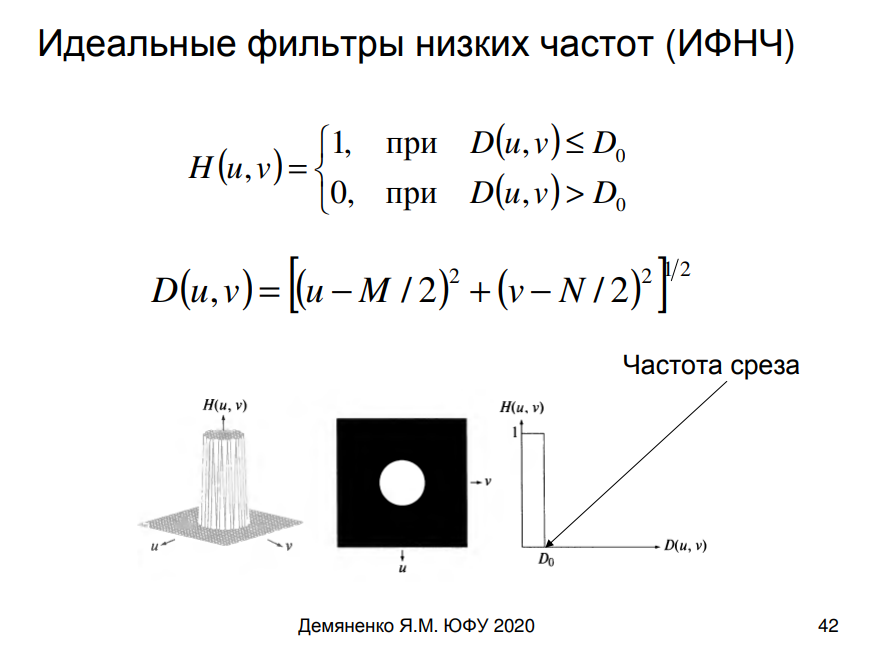

In [7]:
def ideal_low_filter(D0):
    ideal_low = np.zeros((height, width), np.float32)
    for x in range(width):
        for y in range(height):
            if distance(x, y, width, height) <= D0:
                ideal_low[x][y] = 1
    return ideal_low

In [8]:
def ideal_high_filter(D0):
    ideal_high = np.zeros((height, width), np.float32)
    for x in range(width):
        for y in range(height):
            if distance(x, y, width, height) > D0:
                ideal_high[x][y] = 1
    return ideal_high

In [9]:
interactive_plot = interactive(
    filter_result_inter,
    D=widgets.IntSlider(min=5, max=250, step=5, value=20),
    use_filter="ideal_low"
)

output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=20, description='D', max=250, min=5, step=5), IntSlider(value=2, descrip…

In [10]:
interactive_plot = interactive(
    filter_result_inter,
    D=widgets.IntSlider(min=5, max=250, step=5, value=20),
    use_filter="ideal_high"
)

output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=20, description='D', max=250, min=5, step=5), IntSlider(value=2, descrip…

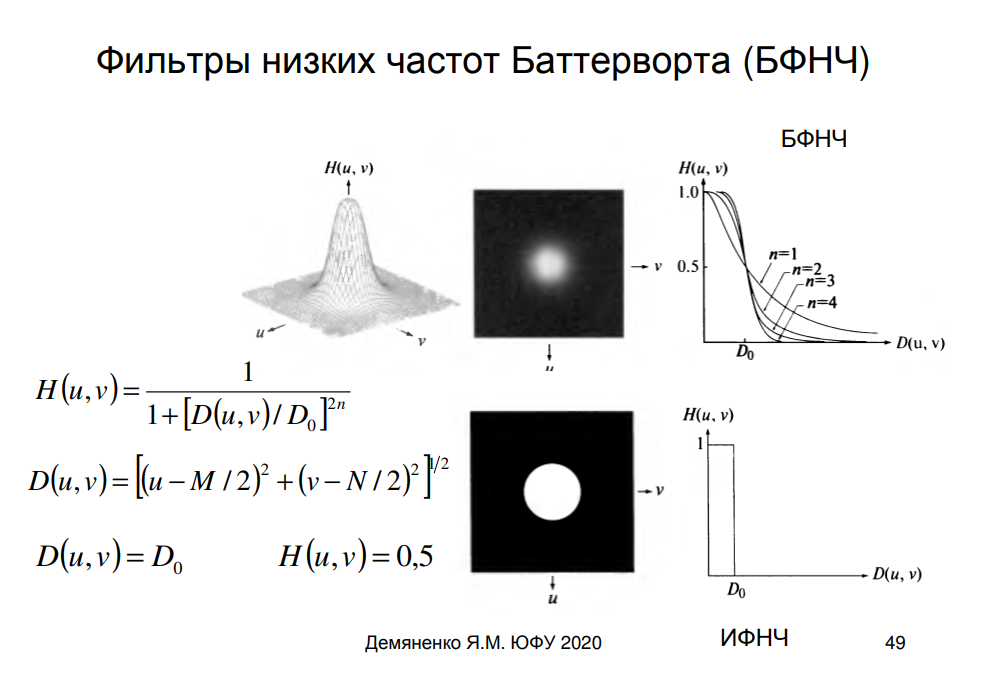

In [11]:
def batervort_formula(x, y, width, height, D0, n):
    return 1 / ((1 + distance(x, y, width, height) / D0)**(2*n))

In [12]:
def batervort_low_filter(D0, n):
    batervort_low = np.zeros((height, width), np.float32)
    for x in range(width):
        for y in range(height):
            batervort_low[x][y] = batervort_formula(x, y, width, height, D0, n)
    return batervort_low

In [13]:
def batervort_high_filter(D0, n):
    batervort_high = np.zeros((height, width), np.float32)
    for x in range(width):
        for y in range(height):
            batervort_high[x][y] = 1 - batervort_formula(x, y, width, height, D0, n)
    return batervort_high

In [14]:
interactive_plot = interactive(
    filter_result_inter,
    D=widgets.IntSlider(min=5, max=250, step=5, value=20),
    use_filter="batervort_low"
)

output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=20, description='D', max=250, min=5, step=5), IntSlider(value=2, descrip…

In [15]:
interactive_plot = interactive(
    filter_result_inter,
    D=widgets.IntSlider(min=5, max=250, step=5, value=20),
    use_filter="batervort_high"
)

output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=20, description='D', max=250, min=5, step=5), IntSlider(value=2, descrip…

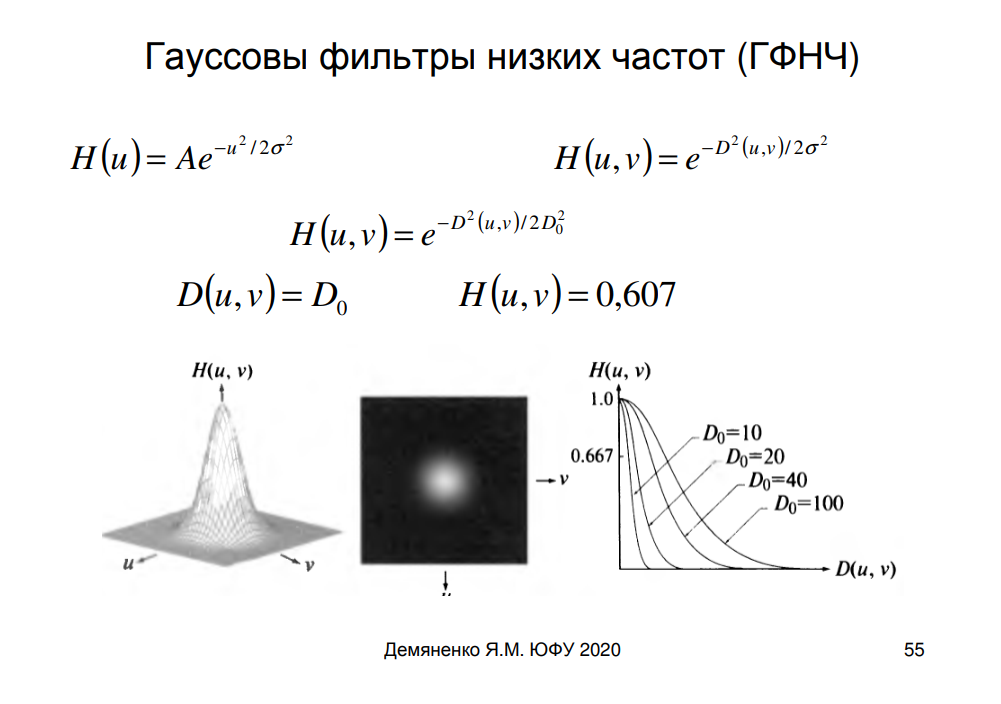

In [16]:
def gauss_formula(x, y, width, height, d):
    return math.exp((-1*distance(x,y,width,height)**2)/d)

In [17]:
def gauss_low_filter(D0):
    gauss_low = np.zeros((width, height), np.float32)
    for x in range(width):
        for y in range(height):
            d = D0 ** 2
            d *= 2
            gauss_low[x][y] = gauss_formula(x, y, width, height, d)
    return gauss_low


In [18]:
def gauss_high_filter(D0):
    gauss_high = np.zeros((width, height), np.float32)
    for x in range(width):
        for y in range(height):
            d = D0 ** 2
            d *= 2
            gauss_high[x][y] = 1 - gauss_formula(x, y, width, height, d)
    return gauss_high

In [19]:
interactive_plot = interactive(
    filter_result_inter,
    D=widgets.IntSlider(min=5, max=250, step=5, value=20),
    use_filter="gauss_low"
)

output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot


interactive(children=(IntSlider(value=20, description='D', max=250, min=5, step=5), IntSlider(value=2, descrip…

In [29]:
interactive_plot = interactive(
    filter_result_inter,
    D=widgets.IntSlider(min=5, max=250, step=5, value=20),
    use_filter="gauss_high"
)

output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=20, description='D', max=250, min=5, step=5), IntSlider(value=2, descrip…